In [61]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Lendo o Dataset

In [62]:
diretorio = "dataset_tomate.csv"

df = pd.read_csv(diretorio)


# Conhecendo os dados

In [63]:
df.head()

,id,trat,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,...,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08,Classe
0,1,102,0.798284,1.197380,0.692652,16710.29721,9.728142,0.729767,1.094620,0.698726,...,1.069718,0.662425,13090.11459,6.216968,0.684125,1.026146,0.636865,13352.81776,5.421333,1
1,2,11,0.806955,1.210392,0.705323,19513.85630,10.557411,0.774359,1.161514,0.717367,...,1.166604,0.680269,22731.09954,8.380453,0.725521,1.088240,0.669113,16190.82038,6.491860,0
2,3,103,0.825104,1.237610,0.708468,18074.06986,11.141408,0.786941,1.180385,0.730471,...,1.096008,0.680238,12330.21702,6.670915,0.728171,1.092214,0.655206,15313.16198,6.551268,1
3,4,112,0.788884,1.183279,0.664787,16226.23017,8.990752,0.743874,1.115782,0.690141,...,1.061948,0.644786,12085.07787,6.017714,0.728161,1.092201,0.640739,16562.17418,6.608121,1
4,5,114,0.764986,1.147432,0.673490,14920.80711,8.269806,0.715948,1.073894,0.695619,...,1.032176,0.660206,10053.17885,5.571702,0.694320,1.041437,0.642373,13760.95583,5.665567,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          132 non-null    int64  
 1   trat        132 non-null    int64  
 2   NDVI_d28    132 non-null    float64
 3   SAVI_d28    132 non-null    float64
 4   GNDVI_d28   132 non-null    float64
 5   MCARI1_d28  132 non-null    float64
 6   SR_d28      132 non-null    float64
 7   NDVI_d01    132 non-null    float64
 8   SAVI_d01    132 non-null    float64
 9   GNDVI_d01   132 non-null    float64
 10  MCARI1_d01  132 non-null    float64
 11  SR_d01      132 non-null    float64
 12  NDVI_d04    132 non-null    float64
 13  SAVI_d04    132 non-null    float64
 14  GNDVI_d04   132 non-null    float64
 15  MCARI1_d04  132 non-null    float64
 16  SR_d04      132 non-null    float64
 17  NDVI_d08    132 non-null    float64
 18  SAVI_d08    132 non-null    float64
 19  GNDVI_d08   132 non-null    f

In [65]:
print(df.groupby('Classe').size())

Classe
0    41
1    91
dtype: int64


# Dividindo os dados em conjunto de treinamento e de testes

In [66]:
# Selecionando um sub-dataframe, 
# e outro com a variável de classes
entradas = df[['trat', 'NDVI_d28', 'SAVI_d28', 'GNDVI_d28', 'MCARI1_d28', 'SR_d28', 'NDVI_d01', 
               'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01', 'NDVI_d04', 'SAVI_d04', 'GNDVI_d04',
              'MCARI1_d04', 'SR_d04', 'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08']]
classes = df['Classe']
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

Formato das tabelas de dados (132, 21) e classes (132,)


In [67]:
from sklearn.model_selection import train_test_split

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados de treino (105, 21) e teste (27, 21)


In [68]:
entradas_treino.head()

,trat,NDVI_d28,SAVI_d28,GNDVI_d28,MCARI1_d28,SR_d28,NDVI_d01,SAVI_d01,GNDVI_d01,MCARI1_d01,...,NDVI_d04,SAVI_d04,GNDVI_d04,MCARI1_d04,SR_d04,NDVI_d08,SAVI_d08,GNDVI_d08,MCARI1_d08,SR_d08
0,102,0.798284,1.197380,0.692652,16710.29721,9.728142,0.729767,1.094620,0.698726,21499.94698,...,0.713179,1.069718,0.662425,13090.114590,6.216968,0.684125,1.026146,0.636865,13352.81776,5.421333
127,82,0.750210,1.125268,0.644542,14328.38849,7.591731,0.707780,1.061642,0.668688,21656.64142,...,0.683641,1.025412,0.626456,11786.650460,5.459075,0.658993,0.988445,0.617495,11584.92863,4.928687
52,214,0.780903,1.171305,0.690097,15093.28902,9.031314,0.738434,1.107625,0.709253,25493.51936,...,0.687456,1.031124,0.655161,9431.856566,5.534781,0.689673,1.034461,0.654742,11536.11861,5.528516
112,63,0.821538,1.232262,0.682232,18581.87596,11.057998,0.796382,1.194549,0.711331,34253.45207,...,0.746678,1.119972,0.652294,16195.476820,7.210825,0.686715,1.030031,0.623842,13349.71235,5.484879
122,73,0.806878,1.210271,0.688115,17263.46721,10.170591,0.751751,1.127599,0.699976,25997.41902,...,0.707443,1.061117,0.639093,12995.393990,6.070392,0.678223,1.017293,0.623547,13112.05762,5.327960


In [69]:
classes_treino.head()

0      1
127    1
52     1
112    1
122    1
Name: Classe, dtype: int64

# Chegou a hora de aplicar o modelo preditivo

Escolhemos a função KNeighborsClassifier onde devemos dizer explicitamente ao classificador para usar a distância euclidiana para determinar a proximidade entre pontos vizinhos

In [73]:
# Importa a biblioteca
from sklearn.neighbors import KNeighborsClassifier

# Cria o classificar KNN
k = 5
modelo = KNeighborsClassifier(n_neighbors=k)

# Cria o modelo de machine learning
modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier()

In [74]:
# Para obter as previsões, basta chamar o método predict()
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: [1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1]


In [75]:
# Para determinar a quantidade de acertos (acuracia)

from sklearn.metrics import accuracy_score

acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.9629629629629629


# Visualizando o modelo de forma gráfica

Com o campo train conseguimos visualizar da melhor maneira os

In [28]:
# Unificamos os dados de entrada e as classes de treino e teste em um daframe cada
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="Classe", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

c:\users\guhda\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


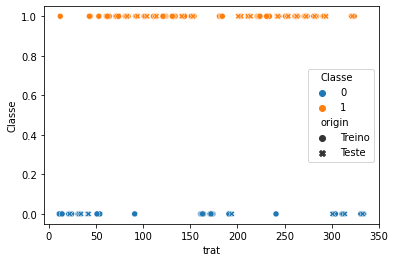

In [29]:
import seaborn as sns
## Unificamos os dataframes de treinamento e teste em um novo DataFrame
# indicando a origem dos dados
novo_df = pd.concat((df_treino, df_teste), keys=['train', 'test'])
novo_df['origin'] = ''
novo_df.loc['train','origin'] = 'Treino'
novo_df.loc['test','origin'] = 'Teste'

# Usamos o scatterplot do seaborn, informando mudando o marcador de acordo com a origem do dado
sns.scatterplot('trat', 'Classe', 
                hue='Classe', style='origin', data=novo_df)

plt.show()

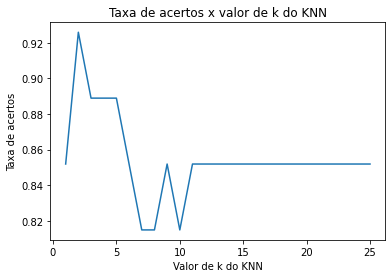

In [30]:
# loop for para diferntes k
k_range = list(range(1,26))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))
  
  
plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()